# `Group Project` - Boston 2017 Bike Sharing Analysis

## Introduction
In this project we will work with real world data from "Blue Bikes" which is a bike sharing firm based in Boston.

Our focus lies on data of the year 2017 and we will make a comprehensive analysis, in which we use typical data analysis and machine learning approaches to make use of the data to monitize and optimize the operations of "Blue Bikes". The overall topic is smart mobility systems and how we can use data in impactful ways to address pressing societal issues. In terms of bike sharing the addressed societal issue are the reduce of greenhouse gas emissions, reduce of pollution as health risk for urban population, reduce of (fatal) road accidents and to create a more efficient road transport infrastructur. We will cover the following task:

- **Task 1) Data Collection & Preparation**: 
    * Cleaning of datasets for use in later analysis stages
- **Task 2) Descriptive Analysis**: 
    * Demonstrate temporal demand patterns and seasonality
    * Demonstrate geographical demand patterns 
    * Define Key Performance Indicators which provides overview of current fleet operations
- **Task 3) Predictive Analysis**:
    * Forecast total system-level demand in the next hour

**The authors of this analysis are:**
* Robin Kirch      (7364580)
* Niklas Nesseler  (7367375)
* Lukas Tempfli    (7367097)
* Pascal Zajonz    (7369974)
* Sven Dornbrach   (7364484)
* Moritz Danhausen (7369413)


Hint: Please run the seperated cells from the top to the bottom

### Required Imports

In [1]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime, timedelta 
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime 
from datetime import timedelta 
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")
#import etc


# `Task 1) Data Collection & Preparation:`

### Details to Task 1
#TODO
Detailed introduction to task 1 here

In [2]:
raw_data_boston = pd.read_csv("boston_2017.csv")
#Problematisch bei gleicher Startzeit und ggbf. kompletten Dateipfad angeben notwendig

In [3]:

raw_data_boston["start_time"]=pd.to_datetime(raw_data_boston["start_time"], format="%Y/%m/%d %H:")

#rdb=raw_data_boston
#rdb=pd.to_datetime(rdb["start_time"], format="%Y-%m-%d %H:")
raw_data_boston["end_time"]=pd.to_datetime(raw_data_boston["end_time"], format="%Y/%m/%d %H:")
#raw_data_boston
#rdb
raw_data_boston["hour"]=raw_data_boston["start_time"].dt.hour
raw_data_boston["year"]=raw_data_boston["start_time"].dt.year
raw_data_boston["month"]=raw_data_boston["start_time"].dt.month
raw_data_boston["day"]=raw_data_boston["start_time"].dt.day
raw_data_boston["seconds"]=raw_data_boston["start_time"].dt.second

df1=pd.DataFrame({'year':raw_data_boston["year"],'month':raw_data_boston["month"],'day':raw_data_boston["day"],'hour':raw_data_boston["hour"] })
df1=pd.to_datetime(df1, format="%Y/%m/%d, %H:")

raw_data_boston["date_time"]=df1

#del raw_data_boston["hour"]
del raw_data_boston["year"]
del raw_data_boston["month"]
del raw_data_boston["day"]
del raw_data_boston["seconds"]

raw_data_boston

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,hour,date_time
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,0,2017-01-01 00:00:00
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber,0,2017-01-01 00:00:00
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer,0,2017-01-01 00:00:00
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber,0,2017-01-01 00:00:00
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber,0,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
1313769,2017-12-31 23:46:18,2017-12-31 23:50:27,117,141,Binney St / Sixth St,Kendall Street,1846,Subscriber,23,2017-12-31 23:00:00
1313770,2017-12-29 16:11:56,2017-12-29 16:16:18,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber,16,2017-12-29 16:00:00
1313771,2017-12-30 08:09:44,2017-12-30 08:26:08,54,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber,8,2017-12-30 08:00:00
1313772,2017-12-30 12:20:01,2017-12-30 12:49:12,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber,12,2017-12-30 12:00:00


In [4]:
raw_data_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313774 entries, 0 to 1313773
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_time          1313774 non-null  datetime64[ns]
 1   end_time            1313774 non-null  datetime64[ns]
 2   start_station_id    1313774 non-null  int64         
 3   end_station_id      1313774 non-null  int64         
 4   start_station_name  1313774 non-null  object        
 5   end_station_name    1313774 non-null  object        
 6   bike_id             1313774 non-null  int64         
 7   user_type           1313774 non-null  object        
 8   hour                1313774 non-null  int64         
 9   date_time           1313774 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(4), object(3)
memory usage: 100.2+ MB


In [5]:
raw_data_boston.describe()

,start_station_id,end_station_id,bike_id,hour
count,1.313774e+06,1.313774e+06,1.313774e+06,1.313774e+06
mean,8.571053e+01,8.554360e+01,9.931371e+02,1.373430e+01
std,5.634766e+01,5.648317e+01,5.701397e+02,4.777680e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,4.300000e+01,4.300000e+01,5.160000e+02,9.000000e+00
50%,7.400000e+01,7.400000e+01,9.780000e+02,1.400000e+01
75%,1.170000e+02,1.170000e+02,1.512000e+03,1.700000e+01
max,2.320000e+02,2.320000e+02,1.981000e+03,2.300000e+01


In [6]:
raw_data_boston.columns

Index(['start_time', 'end_time', 'start_station_id', 'end_station_id',
       'start_station_name', 'end_station_name', 'bike_id', 'user_type',
       'hour', 'date_time'],
      dtype='object')

In [7]:
raw_data_boston["end_time"].describe()
#start_time nicht zugreifbar

<ipython-input-7-0a5c0f10cd4b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_data_boston["end_time"].describe()


count                 1313774
unique                1245112
top       2017-08-15 17:37:49
freq                        6
first     2017-01-01 00:12:49
last      2018-01-07 20:00:16
Name: end_time, dtype: object

In [8]:
raw_data_boston["start_station_id"].describe()

count    1.313774e+06
mean     8.571053e+01
std      5.634766e+01
min      1.000000e+00
25%      4.300000e+01
50%      7.400000e+01
75%      1.170000e+02
max      2.320000e+02
Name: start_station_id, dtype: float64

In [9]:
raw_data_boston["end_station_id"].describe()

count    1.313774e+06
mean     8.554360e+01
std      5.648317e+01
min      1.000000e+00
25%      4.300000e+01
50%      7.400000e+01
75%      1.170000e+02
max      2.320000e+02
Name: end_station_id, dtype: float64

In [10]:
raw_data_boston["start_station_name"].describe()

count                          1313774
unique                             285
top       MIT at Mass Ave / Amherst St
freq                             42320
Name: start_station_name, dtype: object

In [11]:
raw_data_boston["end_station_name"].describe()

count                          1313774
unique                             283
top       MIT at Mass Ave / Amherst St
freq                             42442
Name: end_station_name, dtype: object

In [12]:
raw_data_boston["bike_id"].describe()

count    1.313774e+06
mean     9.931371e+02
std      5.701397e+02
min      1.000000e+00
25%      5.160000e+02
50%      9.780000e+02
75%      1.512000e+03
max      1.981000e+03
Name: bike_id, dtype: float64

In [13]:
raw_data_boston["user_type"].describe()

count        1313774
unique             2
top       Subscriber
freq         1104738
Name: user_type, dtype: object

In [14]:
raw_data_boston.count()

start_time            1313774
end_time              1313774
start_station_id      1313774
end_station_id        1313774
start_station_name    1313774
end_station_name      1313774
bike_id               1313774
user_type             1313774
hour                  1313774
date_time             1313774
dtype: int64

In [15]:
raw_data_weather= pd.read_csv("weather_hourly_boston.csv")
raw_data_weather["date_time"]=pd.to_datetime(raw_data_weather["date_time"])


In [16]:
raw_data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  43354 non-null  datetime64[ns]
 1   max_temp   43354 non-null  float64       
 2   min_temp   43354 non-null  float64       
 3   precip     43356 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 MB


In [17]:
raw_data_weather.head(20)

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.1,-1.1,0.0
1,2015-01-02 02:00:00,-1.1,-1.1,0.0
2,2015-01-02 03:00:00,-0.6,-0.6,0.0
3,2015-01-02 04:00:00,-0.6,-0.6,0.0
4,2015-01-02 05:00:00,-0.6,-0.6,0.0
5,2015-01-01 06:00:00,-5.6,-5.6,0.0
6,2015-01-01 07:00:00,-5.6,-5.6,0.0
7,2015-01-01 08:00:00,-5.6,-5.6,0.0
8,2015-01-01 09:00:00,-4.4,-4.4,0.0
9,2015-01-01 10:00:00,-5.6,-5.6,0.0


In [18]:
first_date =datetime(year=2017,day=1,month=1)
lastdate=datetime(year=2017, day=31,month =12)

neu_weather_2017= raw_data_weather[(raw_data_weather["date_time"]>=first_date)&(raw_data_weather["date_time"]<=lastdate)]
neu_weather_2017.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 17520 to 26279
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8667 non-null   datetime64[ns]
 1   max_temp   8667 non-null   float64       
 2   min_temp   8667 non-null   float64       
 3   precip     8667 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 338.6 KB


In [19]:
bike_list = raw_data_boston["bike_id"].unique()
fleet_size = len(bike_list)
fleet_size


1799

In [20]:
def get_date (ts):
    return ts.date()

def get_weekday (ts):
    return ts.weekday()

def get_hour (ts):
    return ts.hour
def set1 (ts):
    return 1

In [21]:
raw_data_boston["Date"] = raw_data_boston["start_time"].apply(lambda ts: get_date (ts))
raw_data_boston["Rented"]=raw_data_boston["Date"].apply(lambda ts: set1(ts))
raw_data_boston.head(50)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,hour,date_time,Date,Rented
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,0,2017-01-01 00:00:00,2017-01-01,1
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber,0,2017-01-01 00:00:00,2017-01-01,1
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer,0,2017-01-01 00:00:00,2017-01-01,1
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber,0,2017-01-01 00:00:00,2017-01-01,1
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber,0,2017-01-01 00:00:00,2017-01-01,1
5,2017-01-01 00:30:40,2017-01-01 00:41:45,47,195,Cross St. at Hanover St.,Brian P. Murphy Staircase at Child Street,1918,Subscriber,0,2017-01-01 00:00:00,2017-01-01,1
6,2017-01-01 00:42:04,2017-01-01 00:46:25,67,179,MIT at Mass Ave / Amherst St,MIT Vassar St,1102,Subscriber,0,2017-01-01 00:00:00,2017-01-01,1
7,2017-01-01 00:43:59,2017-01-01 00:50:42,107,179,Ames St at Main St,MIT Vassar St,1060,Subscriber,0,2017-01-01 00:00:00,2017-01-01,1
8,2017-01-01 00:47:49,2017-01-01 00:58:32,58,33,The Esplanade - Beacon St. at Arlington St.,Kenmore Sq / Comm Ave,1613,Subscriber,0,2017-01-01 00:00:00,2017-01-01,1
9,2017-01-01 00:48:37,2017-01-01 01:04:31,9,15,Agganis Arena - 925 Comm Ave.,Harvard Real Estate - Brighton Mills - 370 Wes...,980,Customer,0,2017-01-01 00:00:00,2017-01-01,1


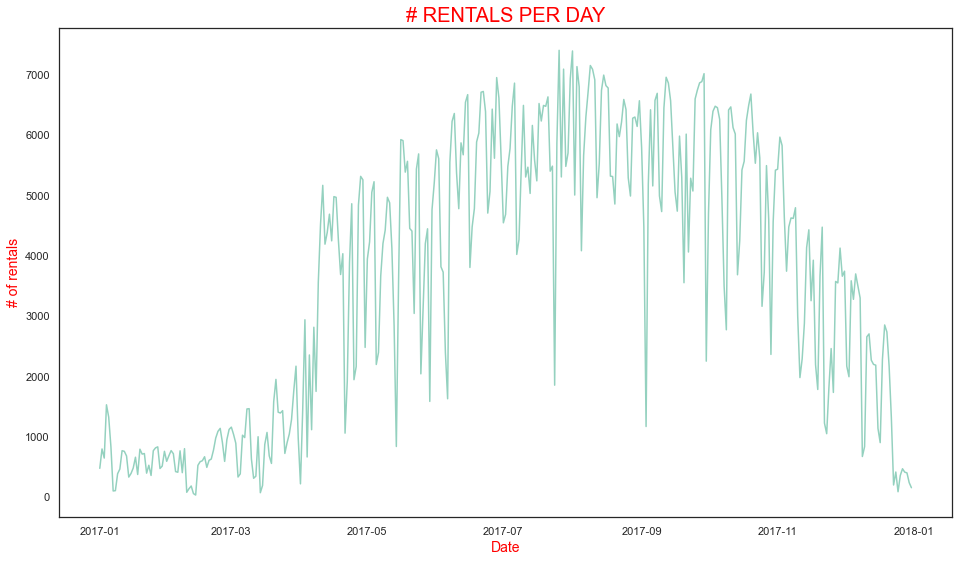

In [22]:
bikes_rented_total = raw_data_boston.groupby("Date")["Rented"].sum()
fig,ax = plt.subplots(figsize=(16,9)) 

ax.plot(bikes_rented_total)

ax.set_title("# RENTALS PER DAY", fontsize = 20, fontname = "arial", color = "red")
ax.set_ylabel("# of rentals", fontsize = 14, color = "red")
ax.set_xlabel("Date", fontsize = 14, color = "red")

plt.show()

In [23]:
bikes_rented_total

Date
2017-01-01     481
2017-01-02     802
2017-01-03     651
2017-01-04    1534
2017-01-05    1330
              ... 
2017-12-27     474
2017-12-28     418
2017-12-29     406
2017-12-30     244
2017-12-31     160
Name: Rented, Length: 365, dtype: int64

## Demand in dependency of the temperature

In [24]:
#connecting both data sets by  the date with an inner join

left=raw_data_boston
right=neu_weather_2017


inner_merge = pd.merge(left=left, right=right, left_on="date_time", right_on="date_time")

inner_merge

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,hour,date_time,Date,Rented,max_temp,min_temp,precip
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,0,2017-01-01,2017-01-01,1,3.9,3.9,0.0
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber,0,2017-01-01,2017-01-01,1,3.9,3.9,0.0
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer,0,2017-01-01,2017-01-01,1,3.9,3.9,0.0
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber,0,2017-01-01,2017-01-01,1,3.9,3.9,0.0
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber,0,2017-01-01,2017-01-01,1,3.9,3.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297140,2017-12-31 00:16:21,2017-12-31 00:40:04,66,91,Allston Green District - Griggs St at Commonwe...,One Kendall Square at Hampshire St / Portland St,325,Subscriber,0,2017-12-31,2017-12-31,1,-7.8,-7.8,0.0
1297141,2017-12-31 00:28:08,2017-12-31 00:33:06,12,27,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,Roxbury Crossing T Stop - Columbus Ave at Trem...,1709,Subscriber,0,2017-12-31,2017-12-31,1,-7.8,-7.8,0.0
1297142,2017-12-31 00:42:58,2017-12-31 00:52:44,76,179,Central Sq Post Office / Cambridge City Hall a...,MIT Vassar St,762,Subscriber,0,2017-12-31,2017-12-31,1,-7.8,-7.8,0.0
1297143,2017-12-31 00:54:06,2017-12-31 00:59:29,36,81,Copley Square - Dartmouth St at Boylston St,Boylston St at Washington St,1326,Subscriber,0,2017-12-31,2017-12-31,1,-7.8,-7.8,0.0


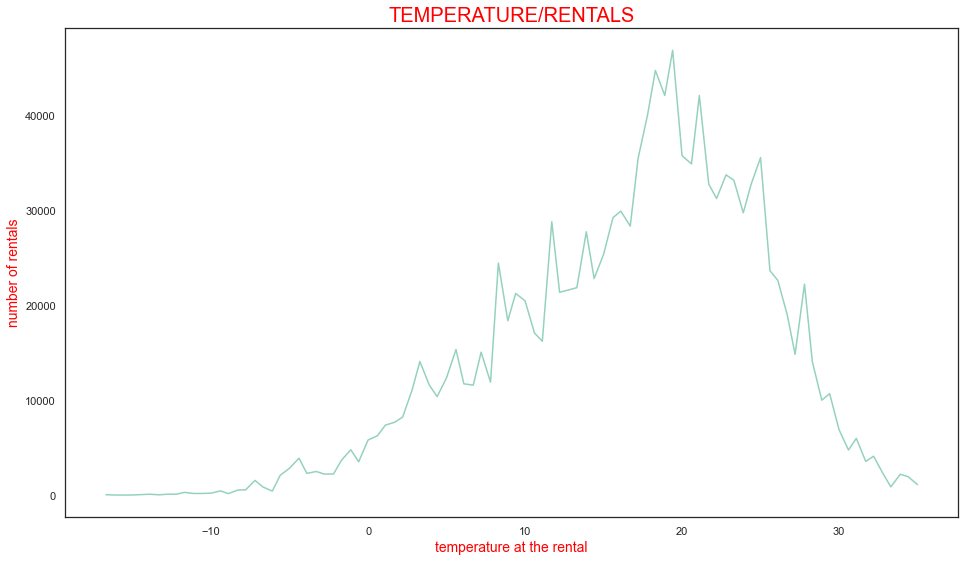

In [25]:

weather_rentals=inner_merge.groupby("min_temp")["Rented"].sum()

Fig_2, ax_2= plt.subplots(figsize=(16,9))

ax_2.plot(weather_rentals)

ax_2.set_title("TEMPERATURE/RENTALS", fontsize = 20, fontname = "arial", color = "red")
ax_2.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_2.set_xlabel("temperature at the rental", fontsize = 14, color = "red")

plt.show()





## Rented bicycles for each day of the week

In [26]:
#add the weekday to the data

raw_data_boston["Weekday"] = raw_data_boston["start_time"].apply(lambda ts: get_weekday (ts))

<function matplotlib.pyplot.show(close=None, block=None)>

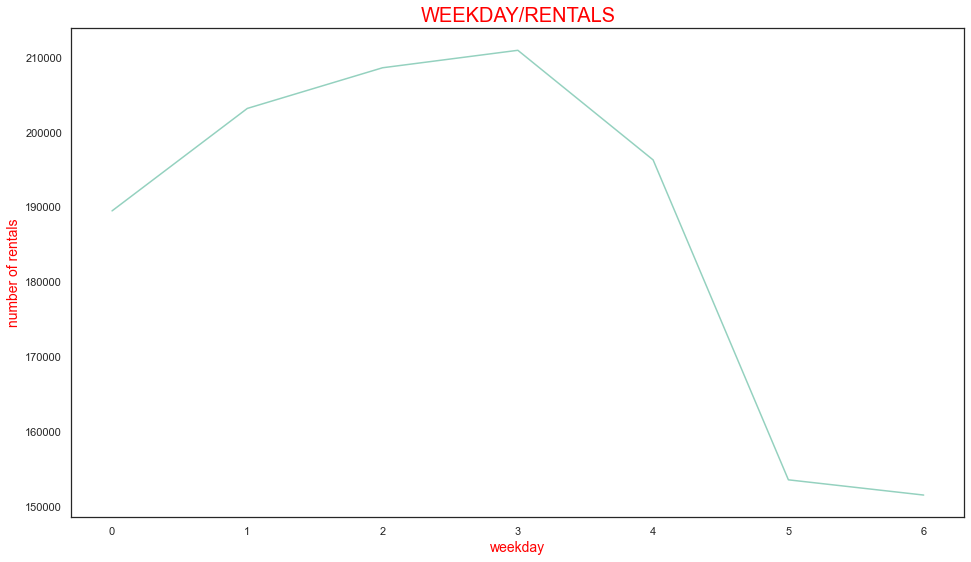

In [27]:
weekday_rentals=raw_data_boston.groupby("Weekday")["Rented"].sum()
Fig_3, ax_3= plt.subplots(figsize=(16,9))

ax_3.plot(weekday_rentals)

ax_3.set_title("WEEKDAY/RENTALS", fontsize = 20, fontname = "arial", color = "red")
ax_3.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_3.set_xlabel("weekday", fontsize = 14, color = "red")


plt.show

## Overview of the hourly demand

<function matplotlib.pyplot.show(close=None, block=None)>

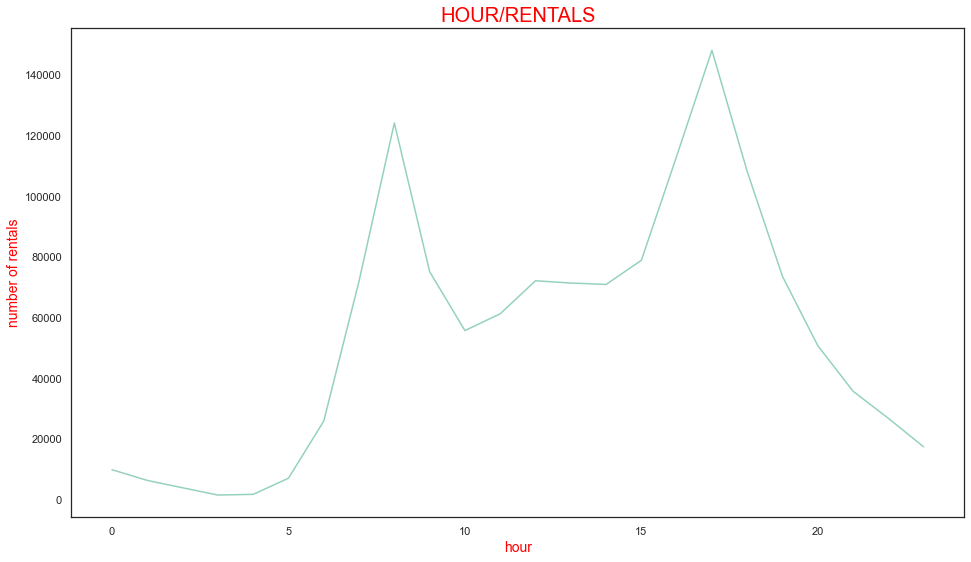

In [28]:
hourly_rentals=raw_data_boston.groupby("hour")["Rented"].sum()
Fig_3, ax_3= plt.subplots(figsize=(16,9))

ax_3.plot(hourly_rentals)

ax_3.set_title("HOUR/RENTALS", fontsize = 20, fontname = "arial", color = "red")
ax_3.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_3.set_xlabel("hour", fontsize = 14, color = "red")


plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

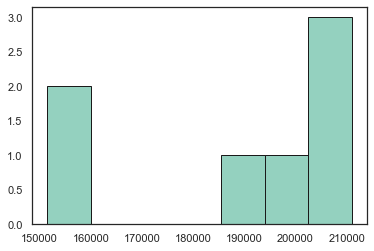

In [29]:
# Ansatz Barplot, da diskrete Werte (Kein Tag 1.4)
# Wahrscheinlich Seaborn nutzen

weekday_rentals=raw_data_boston.groupby("Weekday")["Rented"].sum()

Fig_3, ax_3, gg= plt.hist(weekday_rentals, bins = 7, edgecolor = 'k')

plt.show



## Popularity of the stations 

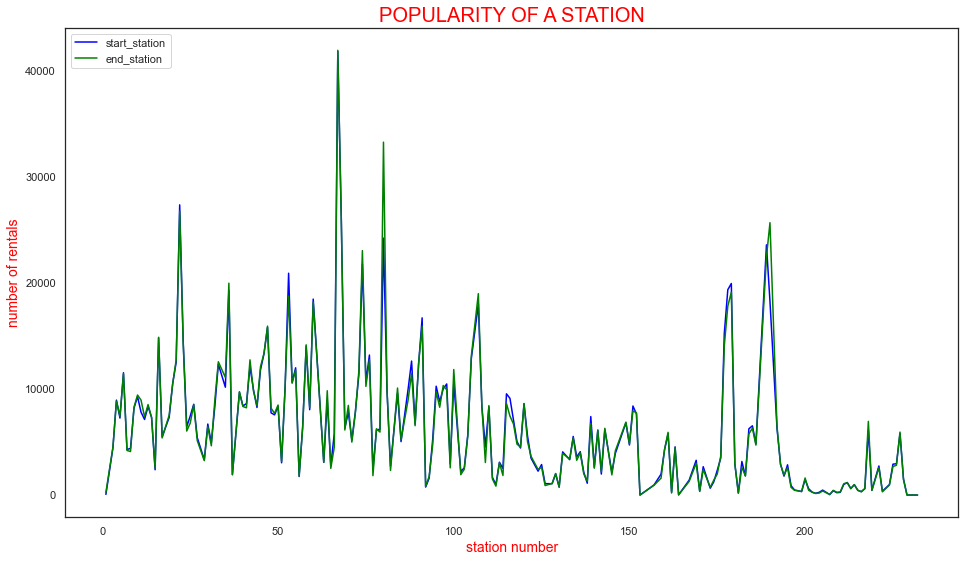

In [30]:
start_station_rentals=inner_merge.groupby("start_station_id")["Rented"].sum()
end_station_rentals=inner_merge.groupby("end_station_id")["Rented"].sum()


Fig_4, ax_4= plt.subplots(figsize=(16,9))

ax_4.plot(start_station_rentals, label="start_station", color = "blue")
ax_4.plot(end_station_rentals , label="end_station", color = "green")

ax_4.set_title("POPULARITY OF A STATION", fontsize = 20, fontname = "arial", color = "red")
ax_4.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_4.set_xlabel("station number", fontsize = 14, color = "red")


plt.legend(loc="upper left")




In [31]:
ypos= raw_data_boston["start_station_id"].unique()
#ypos1=len(ypos)
#ypos1
ypos

array([ 67,  36,  46,  10,  47, 107,  58,   9,  88,  89, 133,  27,  80,
        22,  39, 178,  42,   4, 115, 161, 102,  33,  84,  25, 131, 152,
        51,  21,  23,  32,  94,  49,  54, 146, 179,  30,  96, 190,   8,
        41, 110, 197,  93,  68, 145,  19, 105, 180,  87, 185, 119,  59,
        73, 118,  77, 215,  16,  81,  11, 213,  98,  14, 195, 163, 104,
        78, 176, 184,  76,  95,  43,  74,   6,  91, 169, 183, 100, 116,
       124,  70,   7,  75, 173, 151,  15,   5, 139, 218, 150,  31,  24,
        20,   3,  44, 130,  17,  56, 174, 142, 159,  71,  40, 177, 175,
       160, 189,  63, 108, 141, 149, 137, 109,  37, 117,  90,  57, 121,
       140, 208,  72, 143, 186,  85,  12, 217, 200, 126, 138, 170,  65,
        97, 210, 135, 201, 171,  92, 219,  29, 136, 205, 196, 153,   1,
       192, 202, 162, 214, 209, 216,  64,  48, 203, 129,  60,  13,  35,
        26, 120, 211, 128, 113, 125, 122, 111, 167,  99,  79, 112, 212,
       194,  66,  53, 199, 204,  45,  55,  52,  61, 134,  50, 18

In [32]:
max= raw_data_boston["start_station_id"].quantile(1)
max=int(max)
stations= np.arange(1,233)
stations

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

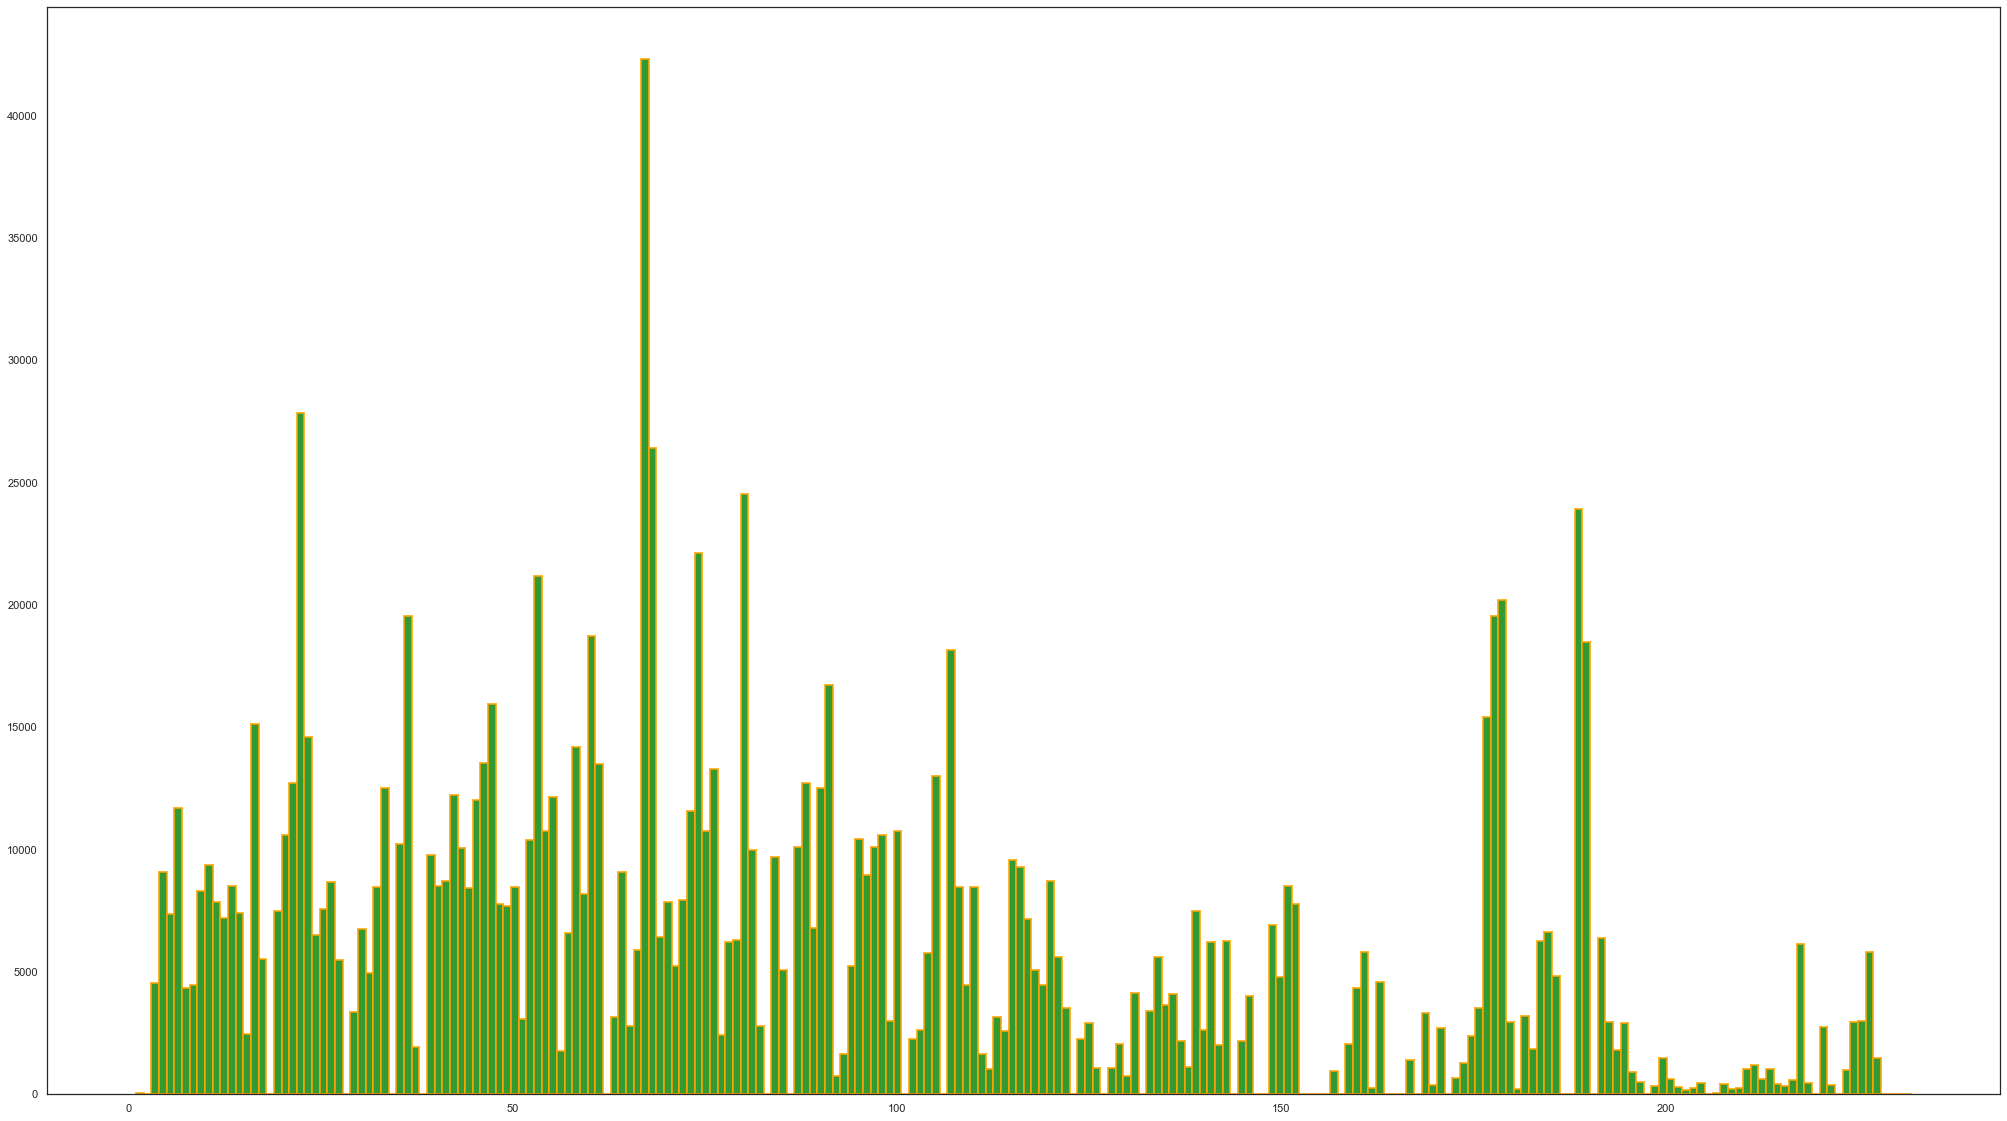

In [33]:
station_rentals=raw_data_boston.groupby("start_station_id")["Rented"].sum()
#plt.bar(stations,station_rentals, width=0.5)
#plt.show
#station_rentals
#plt.hist(raw_data_boston.start_station_id,bins= stations)
plt.figure(figsize=(35,20)) #change your figure size as per your desire here
n,bins,patch = plt.hist(raw_data_boston.start_station_id,bins=232, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)

plt.show()

## Popularity of start stations

In [34]:
df_station_rentals=pd.DataFrame(station_rentals)
df_station_rentals=df_station_rentals.sort_values(["Rented"], ascending=False)

right=df_station_rentals
left=raw_data_boston


inner_merge2 = pd.merge(df_station_rentals,raw_data_boston, on="start_station_id",how="left")
del inner_merge2["start_time"]
del inner_merge2["end_time"]
del inner_merge2["end_station_id"]
del inner_merge2["end_station_name"]
del inner_merge2["bike_id"]
del inner_merge2["user_type"]
del inner_merge2["date_time"]
del inner_merge2["Date"]
del inner_merge2["Rented_y"]
del inner_merge2["Weekday"]
del inner_merge2["hour"]
#pd.merge(left=left, right=right, how="left",left_on="start_station_id", right_on="start_station_id")
inner_merge2=inner_merge2.drop_duplicates(subset=["start_station_id"], keep='first', inplace=False, ignore_index=False)
inner_merge2.set_index("start_station_id",inplace=True)
inner_merge2

,Rented_x,start_station_name
start_station_id,,
67,42320,MIT at Mass Ave / Amherst St
22,27842,South Station - 700 Atlantic Ave.
68,26415,Central Square at Mass Ave / Essex St
80,24532,MIT Stata Center at Vassar St / Main St
189,23910,Kendall T
...,...,...
164,23,Test 000e3
229,4,8D QC Station 01
232,4,Four Corners - 157 Washington St


## Demand in dependency of the weather

<function matplotlib.pyplot.show(close=None, block=None)>

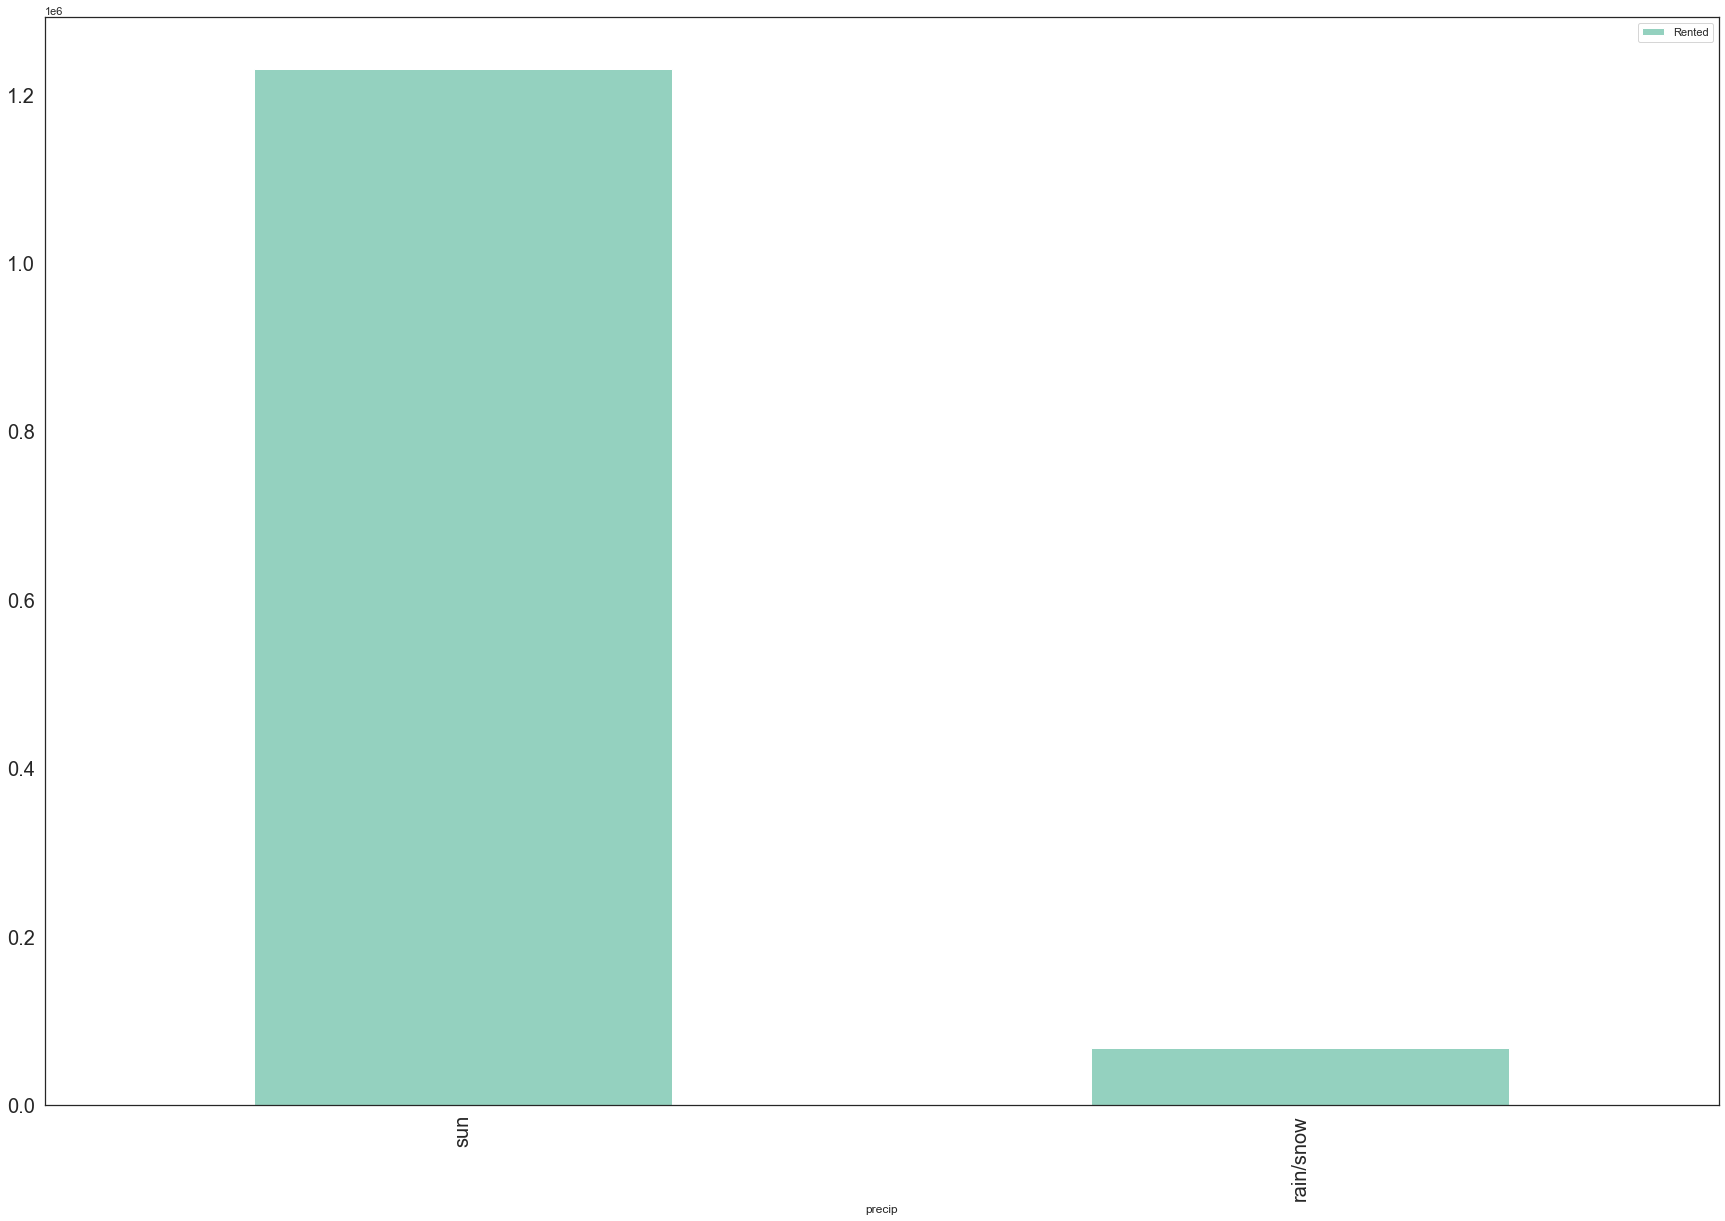

In [35]:

left=raw_data_boston
right=neu_weather_2017


inner_merge3 = pd.merge(left=left, right=right, left_on="date_time", right_on="date_time")

#inner_merge3

station_rentals=inner_merge3.groupby("precip")["Rented"].sum()
#plt.bar(stations,station_rentals, width=0.5)
#plt.show
#station_rentals
#plt.hist(inner_merge3.precip,bins= inner_merge3.Rented)
#plt.figure(figsize=(35,20)) #change your figure size as per your desire here
#n,bins,patch = plt.hist(inner_merge3.precip,bins=2, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)



#dfX=pd.DataFrame({'precip':inner_merge3["precip"],'Rented':inner_merge3.groupby("precip")["Rented"].sum() })
#df.set_index('precip')[['Rented']].plot.bar()
df = pd.DataFrame(station_rentals, columns = ['precip','Rented'])
df.plot.bar(x = 'precip', y = 'Rented',figsize=(30,20),fontsize = 20)
bars = ['sun', 'rain/snow']
y_pos = np.arange(len(bars))

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.show



# `Task 2) Descriptive Analysis:`

### Details to Task 2
#TODO
Detailed introduction to task 2 here

# `Task 3) Descriptive Analysis:`

### Details to Task 3
#TODO
Detailed introduction to task 3 here

In [36]:
data_boston=raw_data_boston
del data_boston["start_time"]
del data_boston["end_time"]
del data_boston["end_station_id"]
del data_boston["end_station_name"]
del data_boston["bike_id"]
del data_boston["user_type"]
del data_boston["start_station_name"]
del data_boston["start_station_id"]
left_mergeT = pd.merge(neu_weather_2017,data_boston, on="date_time",how="left")
left_mergeT




,date_time,max_temp,min_temp,precip,hour,Date,Rented,Weekday
0,2017-01-01 01:00:00,4.4,4.4,0.0,1.0,2017-01-01,1.0,6.0
1,2017-01-01 01:00:00,4.4,4.4,0.0,1.0,2017-01-01,1.0,6.0
2,2017-01-01 01:00:00,4.4,4.4,0.0,1.0,2017-01-01,1.0,6.0
3,2017-01-01 01:00:00,4.4,4.4,0.0,1.0,2017-01-01,1.0,6.0
4,2017-01-01 01:00:00,4.4,4.4,0.0,1.0,2017-01-01,1.0,6.0
...,...,...,...,...,...,...,...,...
1297391,2017-12-31 00:00:00,-7.8,-7.8,0.0,0.0,2017-12-31,1.0,6.0
1297392,2017-12-31 00:00:00,-7.8,-7.8,0.0,0.0,2017-12-31,1.0,6.0
1297393,2017-12-31 00:00:00,-7.8,-7.8,0.0,0.0,2017-12-31,1.0,6.0
1297394,2017-12-31 00:00:00,-7.8,-7.8,0.0,0.0,2017-12-31,1.0,6.0


In [37]:
#def weekday_check (dt):
    
 #   day_number = dt.Weekday()
  #  
   # if day_number <=4:
    #    return 1
    #else:
     #   return 0

#left_mergeT["IsWeekday"] = left_mergeT["Date"].apply(lambda dt: weekday_check(dt))
left_mergeT["IsWeekday"] = left_mergeT["Weekday"].apply(lambda x: 1 if x<=4 else 0)
left_mergeT

,date_time,max_temp,min_temp,precip,hour,Date,Rented,Weekday,IsWeekday
0,2017-01-01 01:00:00,4.4,4.4,0.0,1.0,2017-01-01,1.0,6.0,0
1,2017-01-01 01:00:00,4.4,4.4,0.0,1.0,2017-01-01,1.0,6.0,0
2,2017-01-01 01:00:00,4.4,4.4,0.0,1.0,2017-01-01,1.0,6.0,0
3,2017-01-01 01:00:00,4.4,4.4,0.0,1.0,2017-01-01,1.0,6.0,0
4,2017-01-01 01:00:00,4.4,4.4,0.0,1.0,2017-01-01,1.0,6.0,0
...,...,...,...,...,...,...,...,...,...
1297391,2017-12-31 00:00:00,-7.8,-7.8,0.0,0.0,2017-12-31,1.0,6.0,0
1297392,2017-12-31 00:00:00,-7.8,-7.8,0.0,0.0,2017-12-31,1.0,6.0,0
1297393,2017-12-31 00:00:00,-7.8,-7.8,0.0,0.0,2017-12-31,1.0,6.0,0
1297394,2017-12-31 00:00:00,-7.8,-7.8,0.0,0.0,2017-12-31,1.0,6.0,0


In [38]:
del left_mergeT["Weekday"]
del left_mergeT["Date"]
del left_mergeT["min_temp"]
left_mergeT=left_mergeT.dropna()
left_mergeT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297145 entries, 0 to 1297395
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   date_time  1297145 non-null  datetime64[ns]
 1   max_temp   1297145 non-null  float64       
 2   precip     1297145 non-null  float64       
 3   hour       1297145 non-null  float64       
 4   Rented     1297145 non-null  float64       
 5   IsWeekday  1297145 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 69.3 MB


In [39]:
summe=left_mergeT.groupby("date_time")["Rented"].sum()
df = pd.DataFrame(summe, columns = ['Rented'])
df

,Rented
date_time,
2017-01-01 00:00:00,13.0
2017-01-01 01:00:00,7.0
2017-01-01 02:00:00,4.0
2017-01-01 03:00:00,2.0
2017-01-01 04:00:00,6.0
...,...
2017-12-30 18:00:00,20.0
2017-12-30 20:00:00,11.0
2017-12-30 21:00:00,22.0


In [40]:
left_mergeT2=left_mergeT.drop_duplicates(subset=["date_time"], keep='first', inplace=False, ignore_index=False)
del left_mergeT2['Rented']
left_mergeT3=pd.merge(left_mergeT2,df, on="date_time",how="left")
left_mergeT3.set_index("date_time",inplace=True)
left_mergeT3.head(10)

,max_temp,precip,hour,IsWeekday,Rented
date_time,,,,,
2017-01-01 01:00:00,4.4,0.0,1.0,0,7.0
2017-01-01 02:00:00,5.0,1.0,2.0,0,4.0
2017-01-01 03:00:00,5.0,1.0,3.0,0,2.0
2017-01-01 04:00:00,5.0,1.0,4.0,0,6.0
2017-01-01 05:00:00,4.4,1.0,5.0,0,1.0
2017-01-01 00:00:00,3.9,0.0,0.0,0,13.0
2017-01-02 01:00:00,2.8,0.0,1.0,1,2.0
2017-01-02 02:00:00,2.8,0.0,2.0,1,2.0
2017-01-02 03:00:00,1.7,0.0,3.0,1,1.0


In [50]:
X=left_mergeT3[['max_temp','precip','hour','IsWeekday']]
Y=left_mergeT3['Rented']
X

,max_temp,precip,hour,IsWeekday
date_time,,,,
2017-01-01 01:00:00,4.4,0.0,1.0,0
2017-01-01 02:00:00,5.0,1.0,2.0,0
2017-01-01 03:00:00,5.0,1.0,3.0,0
2017-01-01 04:00:00,5.0,1.0,4.0,0
2017-01-01 05:00:00,4.4,1.0,5.0,0
...,...,...,...,...
2017-12-30 18:00:00,-9.4,1.0,18.0,0
2017-12-30 20:00:00,-8.3,0.0,20.0,0
2017-12-30 21:00:00,-8.3,1.0,21.0,0


In [51]:
Y

date_time
2017-01-01 01:00:00     7.0
2017-01-01 02:00:00     4.0
2017-01-01 03:00:00     2.0
2017-01-01 04:00:00     6.0
2017-01-01 05:00:00     1.0
                       ... 
2017-12-30 18:00:00    20.0
2017-12-30 20:00:00    11.0
2017-12-30 21:00:00    22.0
2017-12-30 22:00:00     6.0
2017-12-31 00:00:00     6.0
Name: Rented, Length: 7930, dtype: float64

In [41]:
#train, testval = train_test_split(inner_merge3, test_size=0.5,random_state=10)

#len(train)


In [42]:
#len(testval)


In [43]:
#validation, test = train_test_split(testval, test_size=0.6,random_state=10)

In [44]:
#len(validation)

In [45]:
#len(test)

In [46]:
#test